**Binary Classification Problem(Exercise): Predicting if a person would buy life insurnace based on his age using logistic regression**


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/CSVs/insurance.csv')
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


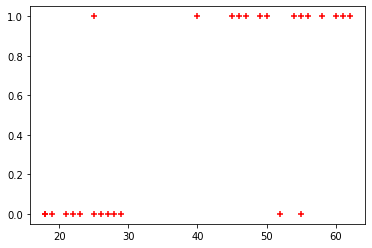

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


In [5]:
# Train Test Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [6]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
X_test

,age
22,40
6,55
14,49
25,54
2,47
20,21


In [8]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[0.45583896, 0.54416104],
       [0.07794759, 0.92205241],
       [0.17462723, 0.82537277],
       [0.08967023, 0.91032977],
       [0.22315281, 0.77684719],
       [0.93865553, 0.06134447]])

In [9]:
#Performance
model.score(X_test,y_test)


0.8333333333333334

In [10]:
y_predicted


array([1, 1, 1, 1, 1, 0])

#**Binary Classification Problem**
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
1.Plot bar charts showing impact of employee salaries on retention
2.Plot bar charts showing corelation between department and employee retention
3.Now build logistic regression model using variables that were narrowed down in step 1
4.Measure the accuracy of the model

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/CSVs/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Data exploration and visualization**


In [14]:
left = df[df.left==1]
left.shape

(3571, 10)

In [15]:
retained = df[df.left==0]
retained.shape

(11428, 10)

Average numbers for all columns



In [16]:
#Average numbers for all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


#**Impact of salary on employee retention**



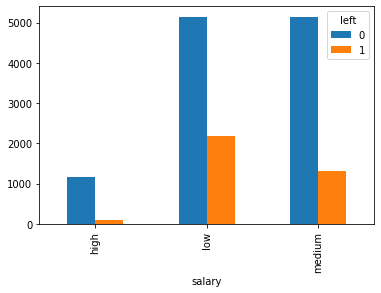

In [17]:

#Impact of salary on employee retention
pd.crosstab(df.salary,df.left).plot(kind='bar')


#**Department wise employee retention rate**



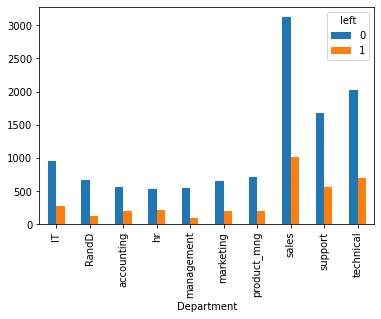

In [18]:
#Department wise employee retention rate
pd.crosstab(df.Department,df.left).plot(kind='bar')


From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis



#**From the data analysis so far we can conclude that we will use following variables as independant variables in our model**
**1. Satisfaction Level**
**2. Average Monthly Hours**
**3. Promotion Last 5 Years**
**4. Salary**

In [19]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [20]:
#Categorical independent variable is replaced
# by dummy variables & one hot encoding 
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")


In [21]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it



In [22]:

#Now we need to remove salary column which is text data. It is already replaced
# by dummy variables so we can safely remove it
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [23]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [24]:
y = df.left

In [25]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [31]:
#Model Creation
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
6218,0.65,111,0,0,0,1
12455,0.44,127,0,0,0,1
11716,0.77,202,0,0,0,1
12381,0.38,145,0,0,0,1
9456,0.53,135,0,0,1,0


In [34]:
# Prediction
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Accuracy of the model



In [35]:
# Accuracy of the model
model.score(X_test,y_test)

0.7851111111111111